# Blending Images

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
img1 = cv2.imread('../Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

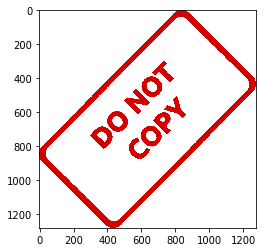

In [7]:
plt.imshow(img2)

In [8]:
## for blend together we need same size

In [9]:
img1.shape


(1401, 934, 3)

In [10]:
img2.shape

(1280, 1277, 3)

In [12]:
img1 = cv2.resize(img1, (1280, 1280))
img2 = cv2.resize(img2, (1280, 1280))

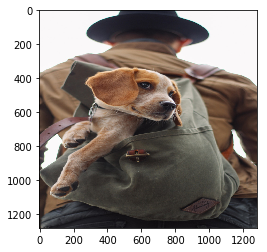

In [13]:
plt.imshow(img1)

In [14]:
blended = cv2.addWeighted(src1=img1, alpha= 0.5, src2=img2, beta= 0.5, gamma=0)

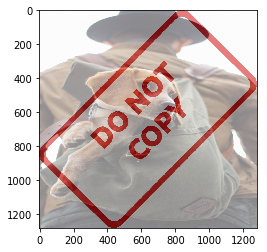

In [15]:
plt.imshow(blended)

In [17]:
# Overlay small image on top of a large image (No Blending )
# Numpy reassignment

In [18]:
img1 = cv2.imread('../Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [20]:
img2 = cv2.resize(img2, (600, 600))

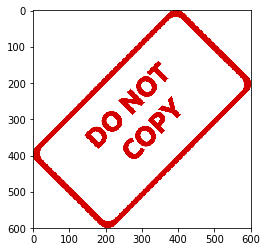

In [21]:
plt.imshow(img2)

In [22]:
large_img = img1
small_img = img2

In [23]:
x_offset = 0
y_offset = 0

In [24]:
x_end = x_offset + small_img.shape[1]
y_end = y_offset + small_img.shape[0]

In [25]:
large_img[y_offset: y_end, x_offset: x_end] = small_img

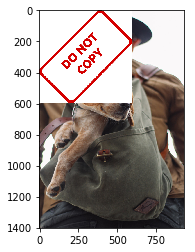

In [26]:
plt.imshow(large_img)

In [27]:
# Blend together images of different sizes

In [28]:
img1 = cv2.imread('../Computer-Vision-with-Python/DATA/dog_backpack.png')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('../Computer-Vision-with-Python/DATA/watermark_no_copy.png')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

In [29]:
img2 = cv2.resize(img2, (600, 600))

In [30]:
img1.shape

(1401, 934, 3)

In [31]:
x_offset = 934-600
y_offset = 1401-600

In [32]:
img2.shape

(600, 600, 3)

In [33]:
rows, cols, channels = img2.shape

In [34]:
roi = img1[y_offset: 1401, x_offset: 934]

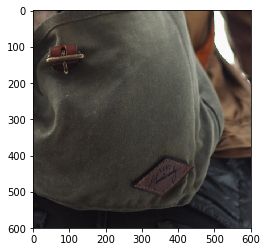

In [35]:
plt.imshow(roi)

In [36]:
img2gray = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

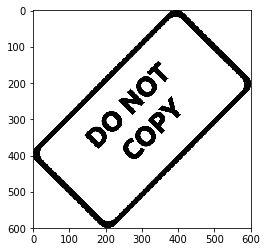

In [38]:
plt.imshow(img2gray, cmap='gray')

In [39]:
mask_inv = cv2.bitwise_not(img2gray)

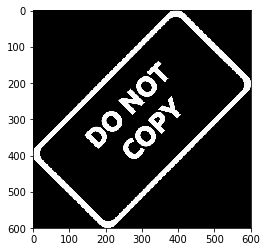

In [41]:
plt.imshow(mask_inv, cmap='gray')

In [42]:
mask_inv.shape


(600, 600)

In [43]:
# to add the channel in the image 

In [44]:
white_background = np.full(img2.shape, 255, dtype=np.uint8)

In [48]:
bk = cv2.bitwise_or(white_background, white_background, mask =mask_inv)

In [46]:
bk.shape

(600, 600, 3)

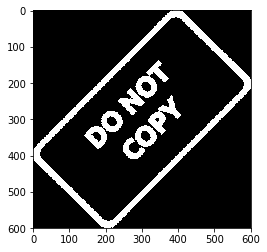

In [49]:
plt.imshow(bk)

In [50]:
fg = cv2.bitwise_or(img2, img2, mask=mask_inv)

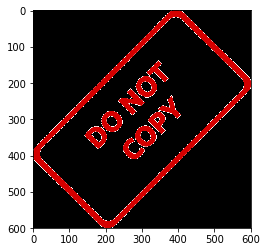

In [51]:
plt.imshow(fg)

In [52]:
final_roi = cv2.bitwise_or(roi, fg)

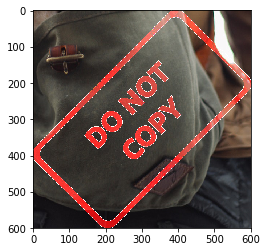

In [53]:
plt.imshow(final_roi)

In [54]:
large_img = img1
small_img = final_roi

In [55]:
large_img[y_offset:y_offset+small_img.shape[0], x_offset: x_offset+small_img.shape[1]] = small_img

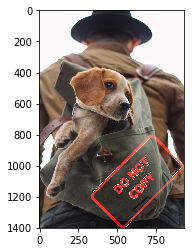

In [56]:
plt.imshow(large_img)